# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [04:23<00:00, 228File/s]  


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

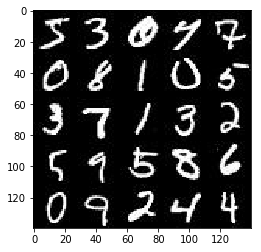

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

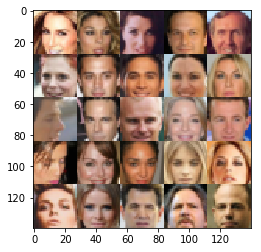

In [6]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\Users\adiba\Anaconda3\envs\tensorflow10\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [10]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learn_rate = tf.placeholder(tf.float32, name='learn_rate')
    return inputs_real, inputs_z, learn_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [11]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x32
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [12]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        # x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 16x16x256 now
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 32x32x3 now
        
        #logits = tf.slice(logits, [0, 2, 2, 0], [-1, 28, 28, -1])
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [13]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    # Smoothing 
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): 
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 50
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 0.0488... Generator Loss: 4.7130
Epoch 0/2... Discriminator Loss: 1.0573... Generator Loss: 13.8209
Epoch 0/2... Discriminator Loss: 0.5452... Generator Loss: 15.8374
Epoch 0/2... Discriminator Loss: 0.8122... Generator Loss: 15.6134


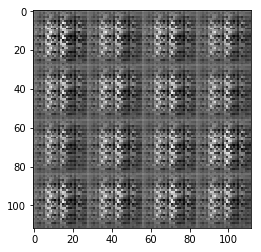

Epoch 0/2... Discriminator Loss: 0.6605... Generator Loss: 11.3699
Epoch 0/2... Discriminator Loss: 3.0570... Generator Loss: 0.0637
Epoch 0/2... Discriminator Loss: 0.1211... Generator Loss: 5.1807
Epoch 0/2... Discriminator Loss: 0.9489... Generator Loss: 0.9285
Epoch 0/2... Discriminator Loss: 0.1996... Generator Loss: 2.7668


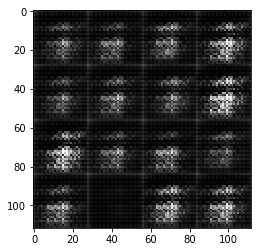

Epoch 0/2... Discriminator Loss: 0.2714... Generator Loss: 5.1402
Epoch 0/2... Discriminator Loss: 0.1961... Generator Loss: 2.6432
Epoch 0/2... Discriminator Loss: 0.1661... Generator Loss: 3.6535
Epoch 0/2... Discriminator Loss: 0.0982... Generator Loss: 5.3332
Epoch 0/2... Discriminator Loss: 0.1864... Generator Loss: 2.4544


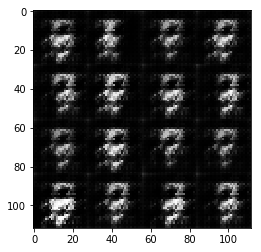

Epoch 0/2... Discriminator Loss: 0.0699... Generator Loss: 4.1509
Epoch 0/2... Discriminator Loss: 2.5110... Generator Loss: 12.7018
Epoch 0/2... Discriminator Loss: 0.6248... Generator Loss: 1.9074
Epoch 0/2... Discriminator Loss: 0.2826... Generator Loss: 4.8344
Epoch 0/2... Discriminator Loss: 0.2290... Generator Loss: 2.7042


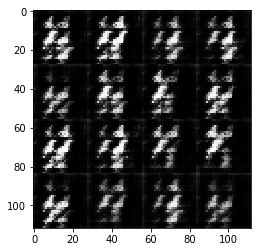

Epoch 0/2... Discriminator Loss: 0.1830... Generator Loss: 2.6888
Epoch 0/2... Discriminator Loss: 0.4583... Generator Loss: 4.6987
Epoch 0/2... Discriminator Loss: 0.3983... Generator Loss: 1.7108
Epoch 0/2... Discriminator Loss: 0.1358... Generator Loss: 3.9265
Epoch 0/2... Discriminator Loss: 0.2403... Generator Loss: 2.1805


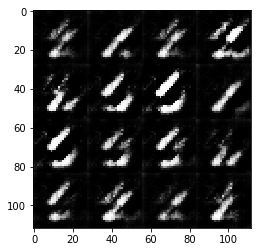

Epoch 0/2... Discriminator Loss: 0.2933... Generator Loss: 2.2287
Epoch 0/2... Discriminator Loss: 0.2057... Generator Loss: 2.8452
Epoch 0/2... Discriminator Loss: 0.6768... Generator Loss: 1.4613
Epoch 0/2... Discriminator Loss: 0.1875... Generator Loss: 2.4379
Epoch 0/2... Discriminator Loss: 0.4848... Generator Loss: 1.5642


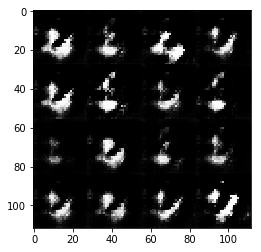

Epoch 0/2... Discriminator Loss: 0.2791... Generator Loss: 2.7202
Epoch 0/2... Discriminator Loss: 0.5008... Generator Loss: 1.9085
Epoch 0/2... Discriminator Loss: 0.2330... Generator Loss: 3.1823
Epoch 0/2... Discriminator Loss: 0.1165... Generator Loss: 4.1470
Epoch 0/2... Discriminator Loss: 0.5572... Generator Loss: 6.2631


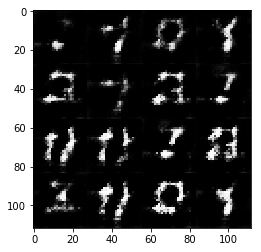

Epoch 0/2... Discriminator Loss: 0.9452... Generator Loss: 6.1393
Epoch 0/2... Discriminator Loss: 0.7846... Generator Loss: 1.1807
Epoch 0/2... Discriminator Loss: 0.3088... Generator Loss: 2.3526
Epoch 0/2... Discriminator Loss: 0.2026... Generator Loss: 2.8284
Epoch 0/2... Discriminator Loss: 0.4823... Generator Loss: 1.3139


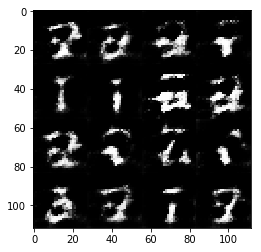

Epoch 0/2... Discriminator Loss: 0.4663... Generator Loss: 1.6925
Epoch 0/2... Discriminator Loss: 0.2355... Generator Loss: 2.7137
Epoch 0/2... Discriminator Loss: 0.6639... Generator Loss: 3.6798
Epoch 0/2... Discriminator Loss: 0.5677... Generator Loss: 1.6235
Epoch 0/2... Discriminator Loss: 0.4295... Generator Loss: 1.8500


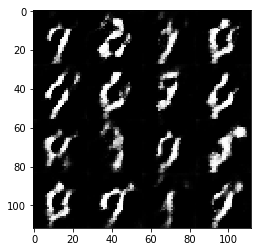

Epoch 0/2... Discriminator Loss: 0.5120... Generator Loss: 2.3413
Epoch 0/2... Discriminator Loss: 0.6024... Generator Loss: 5.2039
Epoch 0/2... Discriminator Loss: 1.6583... Generator Loss: 0.5164
Epoch 0/2... Discriminator Loss: 0.3985... Generator Loss: 2.5972
Epoch 0/2... Discriminator Loss: 0.6579... Generator Loss: 1.7060


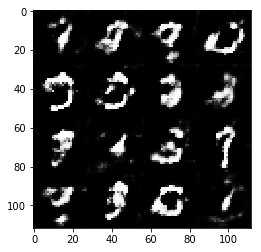

Epoch 0/2... Discriminator Loss: 0.6202... Generator Loss: 2.1424
Epoch 0/2... Discriminator Loss: 1.0629... Generator Loss: 4.7648
Epoch 0/2... Discriminator Loss: 0.5088... Generator Loss: 1.5729
Epoch 0/2... Discriminator Loss: 0.7046... Generator Loss: 4.0831
Epoch 0/2... Discriminator Loss: 0.5205... Generator Loss: 1.7361


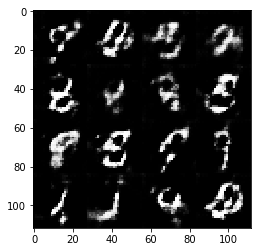

Epoch 0/2... Discriminator Loss: 0.4014... Generator Loss: 2.7698
Epoch 0/2... Discriminator Loss: 0.5796... Generator Loss: 1.4981
Epoch 0/2... Discriminator Loss: 0.5354... Generator Loss: 1.9075
Epoch 0/2... Discriminator Loss: 0.5749... Generator Loss: 1.6183
Epoch 0/2... Discriminator Loss: 0.6757... Generator Loss: 1.2625


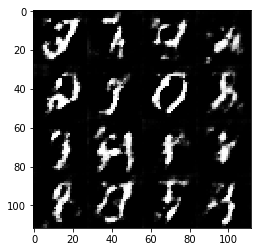

Epoch 0/2... Discriminator Loss: 0.4440... Generator Loss: 1.8117
Epoch 0/2... Discriminator Loss: 0.5477... Generator Loss: 2.5530
Epoch 0/2... Discriminator Loss: 0.7010... Generator Loss: 1.0584
Epoch 0/2... Discriminator Loss: 0.7988... Generator Loss: 1.0087
Epoch 0/2... Discriminator Loss: 0.7347... Generator Loss: 1.1380


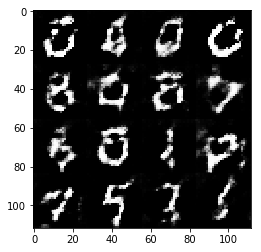

Epoch 0/2... Discriminator Loss: 0.6821... Generator Loss: 1.8599
Epoch 0/2... Discriminator Loss: 0.6959... Generator Loss: 2.5935
Epoch 0/2... Discriminator Loss: 0.6118... Generator Loss: 1.3741
Epoch 0/2... Discriminator Loss: 0.9280... Generator Loss: 1.8846
Epoch 0/2... Discriminator Loss: 1.1652... Generator Loss: 2.9815


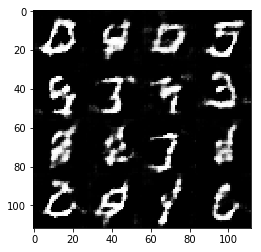

Epoch 0/2... Discriminator Loss: 0.9576... Generator Loss: 0.8822
Epoch 0/2... Discriminator Loss: 0.9822... Generator Loss: 0.8147
Epoch 0/2... Discriminator Loss: 0.6714... Generator Loss: 1.5166
Epoch 0/2... Discriminator Loss: 0.6693... Generator Loss: 1.5047
Epoch 0/2... Discriminator Loss: 0.5883... Generator Loss: 1.8506


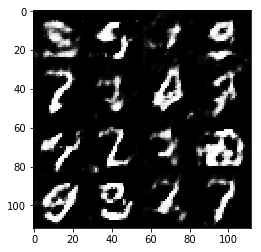

Epoch 0/2... Discriminator Loss: 0.5957... Generator Loss: 2.8133
Epoch 0/2... Discriminator Loss: 0.6518... Generator Loss: 1.3183
Epoch 0/2... Discriminator Loss: 0.5480... Generator Loss: 1.7401
Epoch 0/2... Discriminator Loss: 0.7279... Generator Loss: 1.4371
Epoch 0/2... Discriminator Loss: 0.8340... Generator Loss: 1.0323


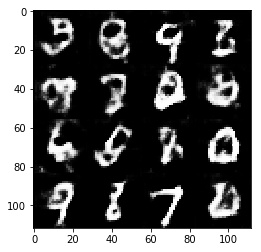

Epoch 0/2... Discriminator Loss: 0.6761... Generator Loss: 1.3113
Epoch 0/2... Discriminator Loss: 0.8724... Generator Loss: 1.5545
Epoch 0/2... Discriminator Loss: 0.7813... Generator Loss: 1.8895
Epoch 0/2... Discriminator Loss: 0.9652... Generator Loss: 0.7207
Epoch 0/2... Discriminator Loss: 0.4412... Generator Loss: 1.6767


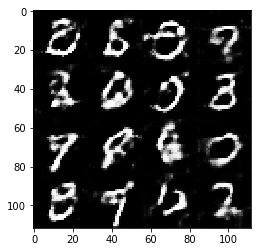

Epoch 0/2... Discriminator Loss: 0.6999... Generator Loss: 1.3775
Epoch 0/2... Discriminator Loss: 1.4503... Generator Loss: 0.7625
Epoch 0/2... Discriminator Loss: 0.9294... Generator Loss: 1.6482
Epoch 0/2... Discriminator Loss: 0.6714... Generator Loss: 1.4787
Epoch 0/2... Discriminator Loss: 0.7092... Generator Loss: 1.8560


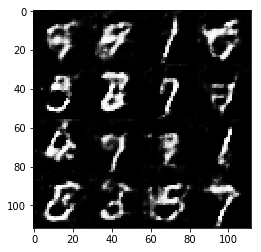

Epoch 0/2... Discriminator Loss: 0.9579... Generator Loss: 0.9107
Epoch 0/2... Discriminator Loss: 0.7403... Generator Loss: 1.3277
Epoch 0/2... Discriminator Loss: 0.6285... Generator Loss: 1.3361
Epoch 0/2... Discriminator Loss: 0.8097... Generator Loss: 1.1405
Epoch 1/2... Discriminator Loss: 0.6440... Generator Loss: 1.2807


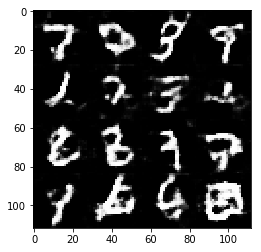

Epoch 1/2... Discriminator Loss: 0.6741... Generator Loss: 2.3604
Epoch 1/2... Discriminator Loss: 0.8353... Generator Loss: 0.8432
Epoch 1/2... Discriminator Loss: 0.8039... Generator Loss: 1.0686
Epoch 1/2... Discriminator Loss: 0.7992... Generator Loss: 1.0140
Epoch 1/2... Discriminator Loss: 0.6652... Generator Loss: 1.5086


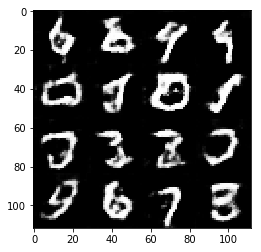

Epoch 1/2... Discriminator Loss: 0.8441... Generator Loss: 0.9291
Epoch 1/2... Discriminator Loss: 0.6042... Generator Loss: 1.8351
Epoch 1/2... Discriminator Loss: 0.4786... Generator Loss: 1.8316
Epoch 1/2... Discriminator Loss: 0.5902... Generator Loss: 1.4864
Epoch 1/2... Discriminator Loss: 0.7705... Generator Loss: 1.0819


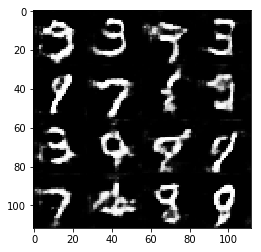

Epoch 1/2... Discriminator Loss: 0.8539... Generator Loss: 0.9052
Epoch 1/2... Discriminator Loss: 1.0163... Generator Loss: 0.6781
Epoch 1/2... Discriminator Loss: 0.6081... Generator Loss: 1.6402
Epoch 1/2... Discriminator Loss: 0.7839... Generator Loss: 1.1642
Epoch 1/2... Discriminator Loss: 0.7617... Generator Loss: 1.4907


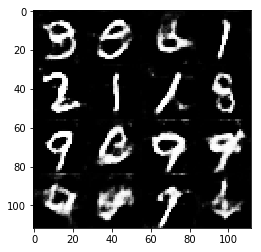

Epoch 1/2... Discriminator Loss: 1.1220... Generator Loss: 0.5237
Epoch 1/2... Discriminator Loss: 0.6333... Generator Loss: 1.2537
Epoch 1/2... Discriminator Loss: 0.7449... Generator Loss: 1.4955
Epoch 1/2... Discriminator Loss: 1.5769... Generator Loss: 3.4241
Epoch 1/2... Discriminator Loss: 0.8193... Generator Loss: 1.7180


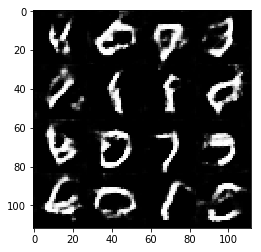

Epoch 1/2... Discriminator Loss: 0.8320... Generator Loss: 0.9288
Epoch 1/2... Discriminator Loss: 0.8140... Generator Loss: 1.4115
Epoch 1/2... Discriminator Loss: 0.8804... Generator Loss: 0.9418
Epoch 1/2... Discriminator Loss: 0.7632... Generator Loss: 1.3481
Epoch 1/2... Discriminator Loss: 0.8519... Generator Loss: 0.8807


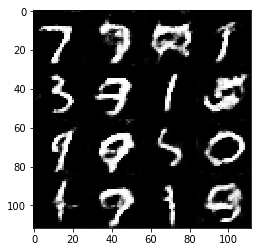

Epoch 1/2... Discriminator Loss: 0.7570... Generator Loss: 1.7386
Epoch 1/2... Discriminator Loss: 0.7636... Generator Loss: 1.9024
Epoch 1/2... Discriminator Loss: 0.8279... Generator Loss: 1.5715
Epoch 1/2... Discriminator Loss: 0.8570... Generator Loss: 1.1222
Epoch 1/2... Discriminator Loss: 0.9059... Generator Loss: 0.8330


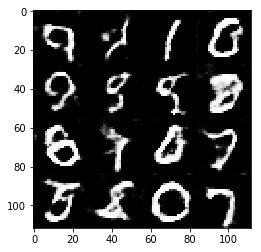

Epoch 1/2... Discriminator Loss: 1.7920... Generator Loss: 3.7211
Epoch 1/2... Discriminator Loss: 0.7841... Generator Loss: 1.0187
Epoch 1/2... Discriminator Loss: 0.6097... Generator Loss: 1.6108
Epoch 1/2... Discriminator Loss: 0.6121... Generator Loss: 1.3587
Epoch 1/2... Discriminator Loss: 0.9538... Generator Loss: 0.8120


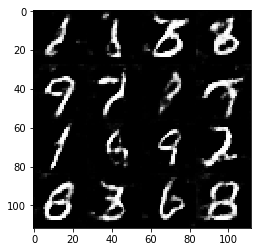

Epoch 1/2... Discriminator Loss: 1.0056... Generator Loss: 2.3659
Epoch 1/2... Discriminator Loss: 0.6935... Generator Loss: 1.2430
Epoch 1/2... Discriminator Loss: 0.9188... Generator Loss: 1.2888
Epoch 1/2... Discriminator Loss: 0.7538... Generator Loss: 1.0699
Epoch 1/2... Discriminator Loss: 0.8249... Generator Loss: 1.0194


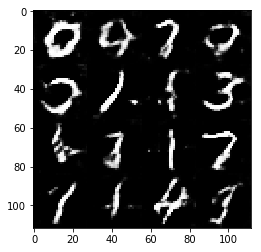

Epoch 1/2... Discriminator Loss: 1.2644... Generator Loss: 0.5065
Epoch 1/2... Discriminator Loss: 0.7287... Generator Loss: 1.1813
Epoch 1/2... Discriminator Loss: 0.6829... Generator Loss: 1.0518
Epoch 1/2... Discriminator Loss: 0.6388... Generator Loss: 1.7264
Epoch 1/2... Discriminator Loss: 0.5688... Generator Loss: 1.3718


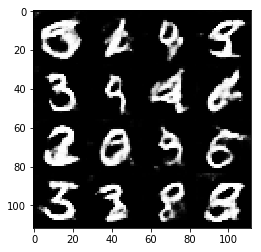

Epoch 1/2... Discriminator Loss: 0.6950... Generator Loss: 1.2256
Epoch 1/2... Discriminator Loss: 1.7134... Generator Loss: 3.2727
Epoch 1/2... Discriminator Loss: 0.6488... Generator Loss: 1.1633
Epoch 1/2... Discriminator Loss: 0.8238... Generator Loss: 1.0257
Epoch 1/2... Discriminator Loss: 0.5325... Generator Loss: 1.3338


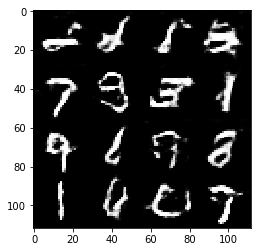

Epoch 1/2... Discriminator Loss: 0.6150... Generator Loss: 1.1643
Epoch 1/2... Discriminator Loss: 1.4370... Generator Loss: 3.5074
Epoch 1/2... Discriminator Loss: 1.9211... Generator Loss: 0.2475
Epoch 1/2... Discriminator Loss: 0.8332... Generator Loss: 1.0230
Epoch 1/2... Discriminator Loss: 0.6463... Generator Loss: 1.1529


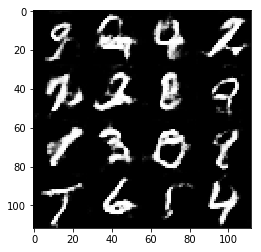

Epoch 1/2... Discriminator Loss: 0.5105... Generator Loss: 1.6866
Epoch 1/2... Discriminator Loss: 4.3161... Generator Loss: 5.6512
Epoch 1/2... Discriminator Loss: 0.6118... Generator Loss: 1.5132
Epoch 1/2... Discriminator Loss: 0.4958... Generator Loss: 1.3605
Epoch 1/2... Discriminator Loss: 0.5565... Generator Loss: 1.2219


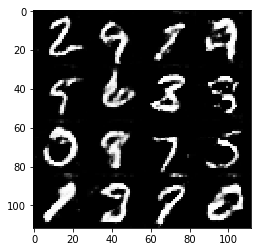

Epoch 1/2... Discriminator Loss: 0.5377... Generator Loss: 1.3246
Epoch 1/2... Discriminator Loss: 3.6784... Generator Loss: 0.0437
Epoch 1/2... Discriminator Loss: 0.8069... Generator Loss: 1.0061
Epoch 1/2... Discriminator Loss: 0.9568... Generator Loss: 0.7069
Epoch 1/2... Discriminator Loss: 1.0156... Generator Loss: 0.7889


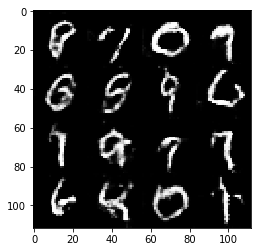

Epoch 1/2... Discriminator Loss: 0.9463... Generator Loss: 0.7278
Epoch 1/2... Discriminator Loss: 0.8992... Generator Loss: 0.8595
Epoch 1/2... Discriminator Loss: 0.7105... Generator Loss: 0.9317
Epoch 1/2... Discriminator Loss: 0.6382... Generator Loss: 1.1231
Epoch 1/2... Discriminator Loss: 1.3625... Generator Loss: 0.3835


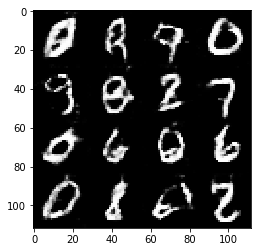

Epoch 1/2... Discriminator Loss: 0.7583... Generator Loss: 0.9768
Epoch 1/2... Discriminator Loss: 0.5960... Generator Loss: 1.2072
Epoch 1/2... Discriminator Loss: 0.5180... Generator Loss: 1.5292
Epoch 1/2... Discriminator Loss: 0.5806... Generator Loss: 1.1482
Epoch 1/2... Discriminator Loss: 0.7264... Generator Loss: 1.2071


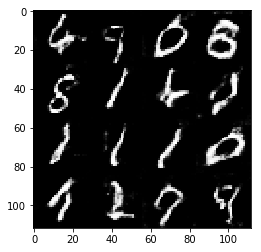

Epoch 1/2... Discriminator Loss: 0.8954... Generator Loss: 0.7668
Epoch 1/2... Discriminator Loss: 0.6246... Generator Loss: 1.2228
Epoch 1/2... Discriminator Loss: 1.2791... Generator Loss: 0.7563
Epoch 1/2... Discriminator Loss: 1.0386... Generator Loss: 1.8786
Epoch 1/2... Discriminator Loss: 0.9865... Generator Loss: 0.7912


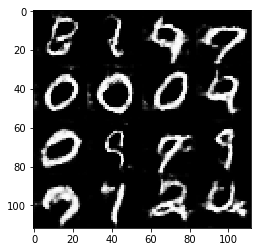

Epoch 1/2... Discriminator Loss: 0.8625... Generator Loss: 1.0957
Epoch 1/2... Discriminator Loss: 0.8754... Generator Loss: 0.8232
Epoch 1/2... Discriminator Loss: 0.7076... Generator Loss: 1.0208
Epoch 1/2... Discriminator Loss: 3.0012... Generator Loss: 0.1068
Epoch 1/2... Discriminator Loss: 0.5381... Generator Loss: 1.5457


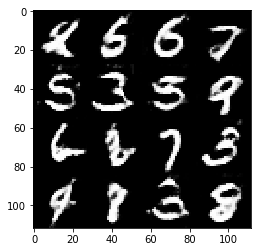

Epoch 1/2... Discriminator Loss: 1.0768... Generator Loss: 0.8384
Epoch 1/2... Discriminator Loss: 0.9222... Generator Loss: 1.0261
Epoch 1/2... Discriminator Loss: 0.7058... Generator Loss: 1.7193
Epoch 1/2... Discriminator Loss: 0.7620... Generator Loss: 1.1905
Epoch 1/2... Discriminator Loss: 0.8871... Generator Loss: 0.9206


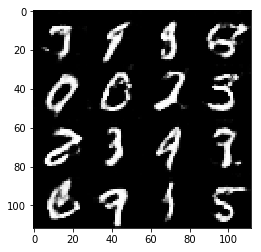

Epoch 1/2... Discriminator Loss: 0.6964... Generator Loss: 1.1080
Epoch 1/2... Discriminator Loss: 1.1763... Generator Loss: 0.5705
Epoch 1/2... Discriminator Loss: 0.8773... Generator Loss: 0.7432


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 0.3893... Generator Loss: 7.9008
Epoch 0/1... Discriminator Loss: 0.6132... Generator Loss: 0.8778
Epoch 0/1... Discriminator Loss: 1.2510... Generator Loss: 0.3716
Epoch 0/1... Discriminator Loss: 0.0338... Generator Loss: 13.5615


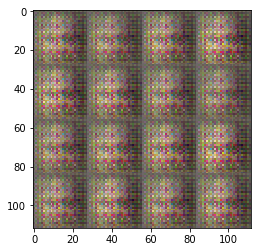

Epoch 0/1... Discriminator Loss: 0.3552... Generator Loss: 13.6587
Epoch 0/1... Discriminator Loss: 0.8888... Generator Loss: 7.7526
Epoch 0/1... Discriminator Loss: 0.3401... Generator Loss: 2.5681
Epoch 0/1... Discriminator Loss: 0.1661... Generator Loss: 8.0377
Epoch 0/1... Discriminator Loss: 0.1841... Generator Loss: 5.8807


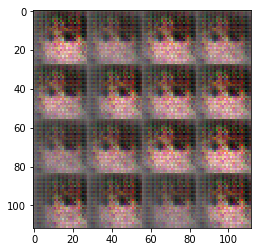

Epoch 0/1... Discriminator Loss: 0.4321... Generator Loss: 2.8633
Epoch 0/1... Discriminator Loss: 0.7154... Generator Loss: 1.2376
Epoch 0/1... Discriminator Loss: 1.0932... Generator Loss: 5.4107
Epoch 0/1... Discriminator Loss: 0.6384... Generator Loss: 1.1744
Epoch 0/1... Discriminator Loss: 1.1608... Generator Loss: 1.2674


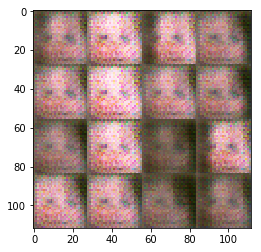

Epoch 0/1... Discriminator Loss: 0.2352... Generator Loss: 2.7094
Epoch 0/1... Discriminator Loss: 0.4982... Generator Loss: 2.5191
Epoch 0/1... Discriminator Loss: 1.2008... Generator Loss: 0.6128
Epoch 0/1... Discriminator Loss: 0.9649... Generator Loss: 4.6004
Epoch 0/1... Discriminator Loss: 0.8979... Generator Loss: 0.8192


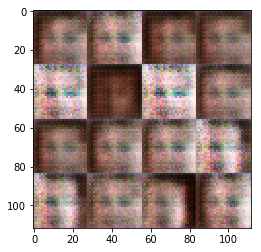

Epoch 0/1... Discriminator Loss: 0.5817... Generator Loss: 2.9665
Epoch 0/1... Discriminator Loss: 0.7820... Generator Loss: 2.3779
Epoch 0/1... Discriminator Loss: 1.1022... Generator Loss: 2.6004
Epoch 0/1... Discriminator Loss: 0.7101... Generator Loss: 2.5789
Epoch 0/1... Discriminator Loss: 0.8929... Generator Loss: 0.7735


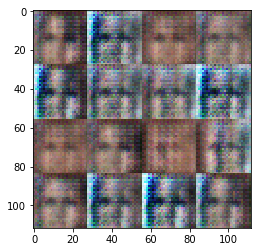

Epoch 0/1... Discriminator Loss: 0.7894... Generator Loss: 1.0976
Epoch 0/1... Discriminator Loss: 0.7779... Generator Loss: 1.3016
Epoch 0/1... Discriminator Loss: 1.3391... Generator Loss: 0.8468
Epoch 0/1... Discriminator Loss: 1.1720... Generator Loss: 0.9683
Epoch 0/1... Discriminator Loss: 0.9409... Generator Loss: 0.9123


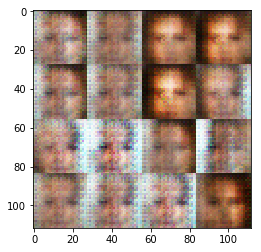

Epoch 0/1... Discriminator Loss: 1.0402... Generator Loss: 1.7606
Epoch 0/1... Discriminator Loss: 0.6087... Generator Loss: 1.6978
Epoch 0/1... Discriminator Loss: 1.1481... Generator Loss: 1.3326
Epoch 0/1... Discriminator Loss: 0.7588... Generator Loss: 1.2428
Epoch 0/1... Discriminator Loss: 1.0323... Generator Loss: 1.1070


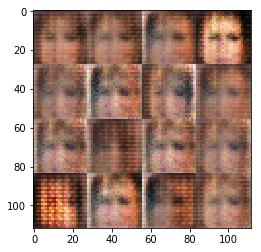

Epoch 0/1... Discriminator Loss: 1.0603... Generator Loss: 2.3212
Epoch 0/1... Discriminator Loss: 1.0427... Generator Loss: 1.4189
Epoch 0/1... Discriminator Loss: 1.2223... Generator Loss: 1.8662
Epoch 0/1... Discriminator Loss: 1.0641... Generator Loss: 1.0053
Epoch 0/1... Discriminator Loss: 0.7649... Generator Loss: 1.2016


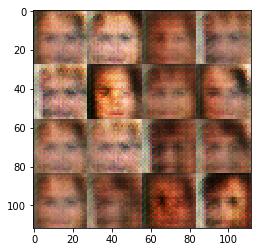

Epoch 0/1... Discriminator Loss: 1.4144... Generator Loss: 1.8057
Epoch 0/1... Discriminator Loss: 0.9873... Generator Loss: 1.1873
Epoch 0/1... Discriminator Loss: 0.9891... Generator Loss: 1.2167
Epoch 0/1... Discriminator Loss: 0.9388... Generator Loss: 1.0412
Epoch 0/1... Discriminator Loss: 1.0568... Generator Loss: 0.8482


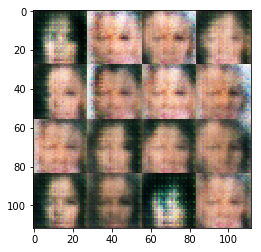

Epoch 0/1... Discriminator Loss: 0.9377... Generator Loss: 0.9615
Epoch 0/1... Discriminator Loss: 0.8817... Generator Loss: 1.1296
Epoch 0/1... Discriminator Loss: 1.1312... Generator Loss: 0.9010
Epoch 0/1... Discriminator Loss: 0.7864... Generator Loss: 1.4538
Epoch 0/1... Discriminator Loss: 1.0191... Generator Loss: 1.0032


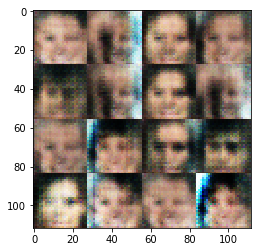

Epoch 0/1... Discriminator Loss: 1.2976... Generator Loss: 1.1441
Epoch 0/1... Discriminator Loss: 1.0277... Generator Loss: 0.9624
Epoch 0/1... Discriminator Loss: 1.0071... Generator Loss: 1.6471
Epoch 0/1... Discriminator Loss: 1.3817... Generator Loss: 1.2834
Epoch 0/1... Discriminator Loss: 0.9109... Generator Loss: 0.9057


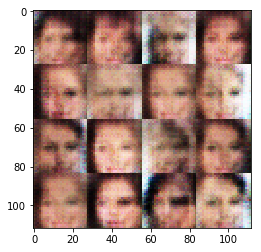

Epoch 0/1... Discriminator Loss: 1.0284... Generator Loss: 0.8619
Epoch 0/1... Discriminator Loss: 0.8930... Generator Loss: 1.2217
Epoch 0/1... Discriminator Loss: 1.1571... Generator Loss: 2.4127
Epoch 0/1... Discriminator Loss: 0.9889... Generator Loss: 0.9022
Epoch 0/1... Discriminator Loss: 0.7651... Generator Loss: 1.5467


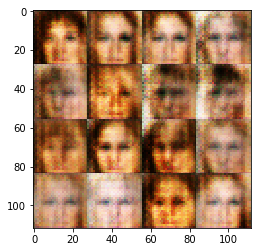

Epoch 0/1... Discriminator Loss: 0.7303... Generator Loss: 2.4514
Epoch 0/1... Discriminator Loss: 1.1844... Generator Loss: 0.5812
Epoch 0/1... Discriminator Loss: 0.7732... Generator Loss: 1.0694
Epoch 0/1... Discriminator Loss: 1.0893... Generator Loss: 0.8516
Epoch 0/1... Discriminator Loss: 1.3222... Generator Loss: 1.4944


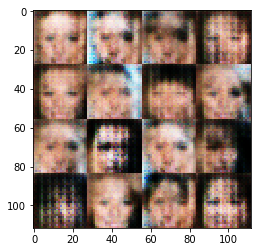

Epoch 0/1... Discriminator Loss: 0.8256... Generator Loss: 1.3456
Epoch 0/1... Discriminator Loss: 0.7737... Generator Loss: 1.0291
Epoch 0/1... Discriminator Loss: 0.7798... Generator Loss: 1.4244
Epoch 0/1... Discriminator Loss: 1.2689... Generator Loss: 0.5601
Epoch 0/1... Discriminator Loss: 1.0372... Generator Loss: 2.6072


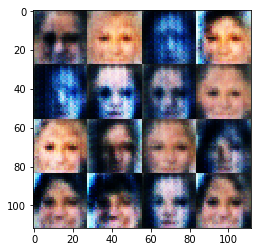

Epoch 0/1... Discriminator Loss: 0.5573... Generator Loss: 1.4471
Epoch 0/1... Discriminator Loss: 0.7881... Generator Loss: 1.7264
Epoch 0/1... Discriminator Loss: 1.0223... Generator Loss: 1.8597
Epoch 0/1... Discriminator Loss: 0.7973... Generator Loss: 1.0981
Epoch 0/1... Discriminator Loss: 0.5642... Generator Loss: 1.9501


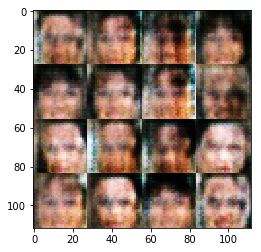

Epoch 0/1... Discriminator Loss: 0.9370... Generator Loss: 0.8188
Epoch 0/1... Discriminator Loss: 0.9217... Generator Loss: 1.5163
Epoch 0/1... Discriminator Loss: 1.1888... Generator Loss: 0.7077
Epoch 0/1... Discriminator Loss: 0.7125... Generator Loss: 1.4440
Epoch 0/1... Discriminator Loss: 0.6898... Generator Loss: 1.2800


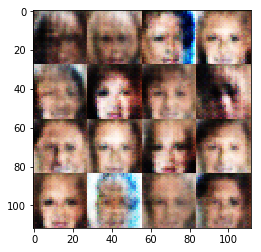

Epoch 0/1... Discriminator Loss: 1.9973... Generator Loss: 0.3287
Epoch 0/1... Discriminator Loss: 1.0672... Generator Loss: 0.7659
Epoch 0/1... Discriminator Loss: 0.8083... Generator Loss: 1.0476
Epoch 0/1... Discriminator Loss: 0.8911... Generator Loss: 1.5369
Epoch 0/1... Discriminator Loss: 0.9277... Generator Loss: 1.3911


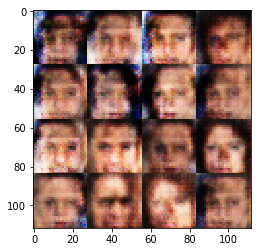

Epoch 0/1... Discriminator Loss: 0.9552... Generator Loss: 0.9864
Epoch 0/1... Discriminator Loss: 1.1994... Generator Loss: 0.6585
Epoch 0/1... Discriminator Loss: 1.0604... Generator Loss: 1.2428
Epoch 0/1... Discriminator Loss: 0.8819... Generator Loss: 1.4084
Epoch 0/1... Discriminator Loss: 1.1510... Generator Loss: 0.6844


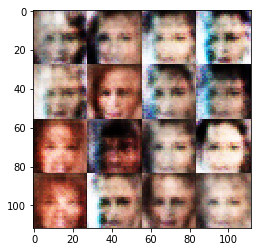

Epoch 0/1... Discriminator Loss: 1.3223... Generator Loss: 0.5629
Epoch 0/1... Discriminator Loss: 1.1002... Generator Loss: 0.7734
Epoch 0/1... Discriminator Loss: 0.9824... Generator Loss: 0.9417
Epoch 0/1... Discriminator Loss: 1.1857... Generator Loss: 0.6283
Epoch 0/1... Discriminator Loss: 1.3168... Generator Loss: 0.5064


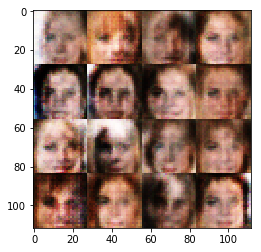

Epoch 0/1... Discriminator Loss: 1.3382... Generator Loss: 0.6319
Epoch 0/1... Discriminator Loss: 1.0800... Generator Loss: 0.8650
Epoch 0/1... Discriminator Loss: 1.0091... Generator Loss: 0.7193
Epoch 0/1... Discriminator Loss: 0.8066... Generator Loss: 1.2136
Epoch 0/1... Discriminator Loss: 1.1895... Generator Loss: 1.2049


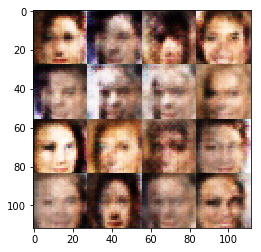

Epoch 0/1... Discriminator Loss: 0.9377... Generator Loss: 1.6331
Epoch 0/1... Discriminator Loss: 1.1875... Generator Loss: 0.7624
Epoch 0/1... Discriminator Loss: 1.4918... Generator Loss: 0.4284
Epoch 0/1... Discriminator Loss: 1.0228... Generator Loss: 0.8100
Epoch 0/1... Discriminator Loss: 1.0055... Generator Loss: 1.1449


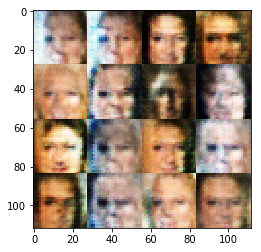

Epoch 0/1... Discriminator Loss: 0.8219... Generator Loss: 1.0322
Epoch 0/1... Discriminator Loss: 0.9024... Generator Loss: 1.2207
Epoch 0/1... Discriminator Loss: 1.0413... Generator Loss: 0.8215
Epoch 0/1... Discriminator Loss: 0.9264... Generator Loss: 0.9360
Epoch 0/1... Discriminator Loss: 1.2480... Generator Loss: 0.7840


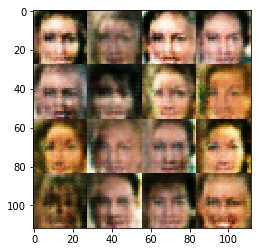

Epoch 0/1... Discriminator Loss: 0.8496... Generator Loss: 0.9412
Epoch 0/1... Discriminator Loss: 1.5210... Generator Loss: 2.1094
Epoch 0/1... Discriminator Loss: 1.1262... Generator Loss: 1.5721
Epoch 0/1... Discriminator Loss: 0.7567... Generator Loss: 1.6981
Epoch 0/1... Discriminator Loss: 1.1106... Generator Loss: 0.8352


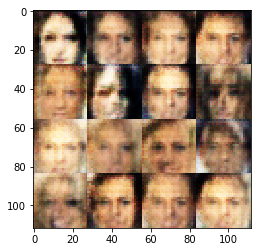

Epoch 0/1... Discriminator Loss: 0.9381... Generator Loss: 1.1807
Epoch 0/1... Discriminator Loss: 0.8574... Generator Loss: 1.0140
Epoch 0/1... Discriminator Loss: 1.3222... Generator Loss: 0.5026
Epoch 0/1... Discriminator Loss: 0.9273... Generator Loss: 0.7371
Epoch 0/1... Discriminator Loss: 1.5506... Generator Loss: 0.3840


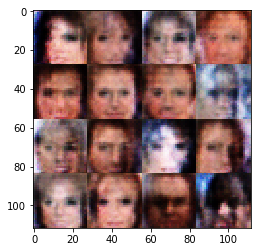

Epoch 0/1... Discriminator Loss: 1.1525... Generator Loss: 0.6259
Epoch 0/1... Discriminator Loss: 1.1909... Generator Loss: 0.5926
Epoch 0/1... Discriminator Loss: 1.0552... Generator Loss: 0.6715
Epoch 0/1... Discriminator Loss: 1.1365... Generator Loss: 0.6938
Epoch 0/1... Discriminator Loss: 1.0078... Generator Loss: 0.7385


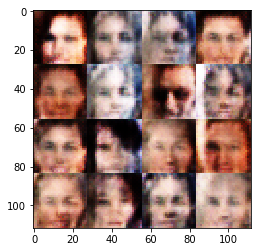

Epoch 0/1... Discriminator Loss: 0.8983... Generator Loss: 1.0669
Epoch 0/1... Discriminator Loss: 0.9214... Generator Loss: 0.9519
Epoch 0/1... Discriminator Loss: 0.9408... Generator Loss: 0.8867
Epoch 0/1... Discriminator Loss: 1.1185... Generator Loss: 0.7551
Epoch 0/1... Discriminator Loss: 1.2463... Generator Loss: 2.4522


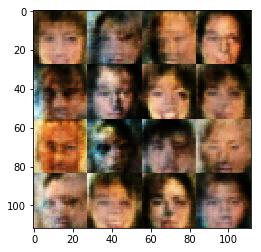

Epoch 0/1... Discriminator Loss: 1.0830... Generator Loss: 1.3708
Epoch 0/1... Discriminator Loss: 0.8062... Generator Loss: 1.2761
Epoch 0/1... Discriminator Loss: 1.1873... Generator Loss: 0.6674
Epoch 0/1... Discriminator Loss: 0.8835... Generator Loss: 2.2779
Epoch 0/1... Discriminator Loss: 0.9546... Generator Loss: 0.9425


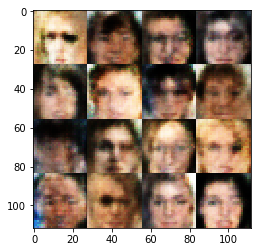

Epoch 0/1... Discriminator Loss: 1.3804... Generator Loss: 2.0986
Epoch 0/1... Discriminator Loss: 1.0210... Generator Loss: 1.1519
Epoch 0/1... Discriminator Loss: 1.1163... Generator Loss: 2.3492
Epoch 0/1... Discriminator Loss: 0.9705... Generator Loss: 0.8001
Epoch 0/1... Discriminator Loss: 0.9267... Generator Loss: 0.9095


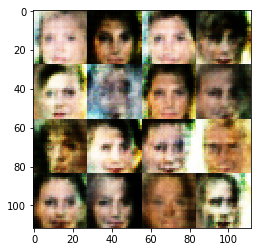

Epoch 0/1... Discriminator Loss: 1.5759... Generator Loss: 0.4281
Epoch 0/1... Discriminator Loss: 0.9454... Generator Loss: 1.4672
Epoch 0/1... Discriminator Loss: 1.2883... Generator Loss: 0.4667
Epoch 0/1... Discriminator Loss: 0.9746... Generator Loss: 0.9387
Epoch 0/1... Discriminator Loss: 1.0194... Generator Loss: 0.9556


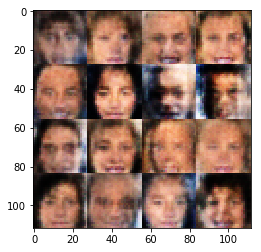

Epoch 0/1... Discriminator Loss: 1.3102... Generator Loss: 0.5107
Epoch 0/1... Discriminator Loss: 1.0411... Generator Loss: 1.2848
Epoch 0/1... Discriminator Loss: 0.8238... Generator Loss: 1.5556
Epoch 0/1... Discriminator Loss: 0.7985... Generator Loss: 1.4667
Epoch 0/1... Discriminator Loss: 0.8483... Generator Loss: 1.0908


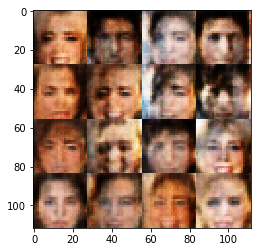

Epoch 0/1... Discriminator Loss: 1.0129... Generator Loss: 0.8453
Epoch 0/1... Discriminator Loss: 1.2957... Generator Loss: 0.5267
Epoch 0/1... Discriminator Loss: 1.3484... Generator Loss: 2.8733
Epoch 0/1... Discriminator Loss: 0.7899... Generator Loss: 1.1889
Epoch 0/1... Discriminator Loss: 1.0473... Generator Loss: 0.6655


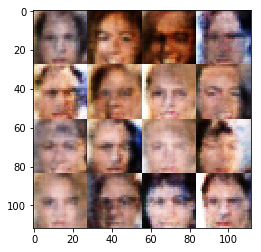

Epoch 0/1... Discriminator Loss: 0.9696... Generator Loss: 0.9578
Epoch 0/1... Discriminator Loss: 0.9055... Generator Loss: 1.5810
Epoch 0/1... Discriminator Loss: 0.7551... Generator Loss: 1.0501
Epoch 0/1... Discriminator Loss: 0.9099... Generator Loss: 1.0414
Epoch 0/1... Discriminator Loss: 1.0695... Generator Loss: 1.5902


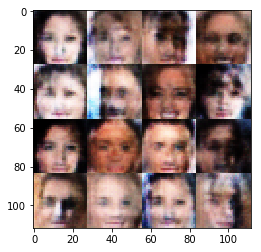

Epoch 0/1... Discriminator Loss: 1.1676... Generator Loss: 1.3433
Epoch 0/1... Discriminator Loss: 0.9001... Generator Loss: 1.4602
Epoch 0/1... Discriminator Loss: 1.1364... Generator Loss: 0.8815
Epoch 0/1... Discriminator Loss: 1.0315... Generator Loss: 1.2745
Epoch 0/1... Discriminator Loss: 0.8494... Generator Loss: 0.8599


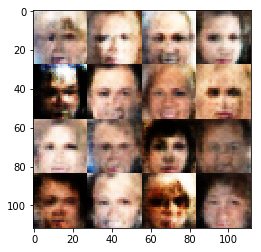

Epoch 0/1... Discriminator Loss: 1.6721... Generator Loss: 2.1688
Epoch 0/1... Discriminator Loss: 1.0156... Generator Loss: 0.9833
Epoch 0/1... Discriminator Loss: 1.2002... Generator Loss: 0.8283
Epoch 0/1... Discriminator Loss: 1.1103... Generator Loss: 1.0213
Epoch 0/1... Discriminator Loss: 1.0469... Generator Loss: 0.9589


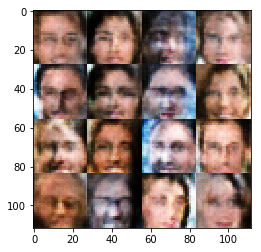

Epoch 0/1... Discriminator Loss: 0.8362... Generator Loss: 1.2549
Epoch 0/1... Discriminator Loss: 0.7704... Generator Loss: 1.1256
Epoch 0/1... Discriminator Loss: 1.2402... Generator Loss: 0.7736
Epoch 0/1... Discriminator Loss: 1.0695... Generator Loss: 1.7932
Epoch 0/1... Discriminator Loss: 0.9736... Generator Loss: 1.2831


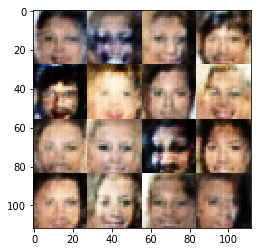

Epoch 0/1... Discriminator Loss: 0.7714... Generator Loss: 1.4052
Epoch 0/1... Discriminator Loss: 1.1355... Generator Loss: 0.7053
Epoch 0/1... Discriminator Loss: 0.9060... Generator Loss: 1.0341
Epoch 0/1... Discriminator Loss: 1.3073... Generator Loss: 0.5144
Epoch 0/1... Discriminator Loss: 1.3425... Generator Loss: 0.4662


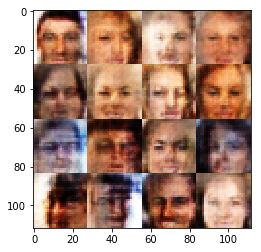

Epoch 0/1... Discriminator Loss: 1.1313... Generator Loss: 0.6074
Epoch 0/1... Discriminator Loss: 1.2874... Generator Loss: 2.6603
Epoch 0/1... Discriminator Loss: 1.4328... Generator Loss: 0.3722
Epoch 0/1... Discriminator Loss: 1.1282... Generator Loss: 1.8003
Epoch 0/1... Discriminator Loss: 1.1003... Generator Loss: 0.6479


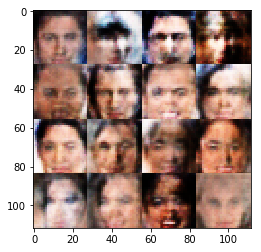

Epoch 0/1... Discriminator Loss: 1.0187... Generator Loss: 0.8777
Epoch 0/1... Discriminator Loss: 1.4745... Generator Loss: 0.4259
Epoch 0/1... Discriminator Loss: 1.2721... Generator Loss: 0.7117
Epoch 0/1... Discriminator Loss: 0.7420... Generator Loss: 1.3208
Epoch 0/1... Discriminator Loss: 1.1890... Generator Loss: 1.5590


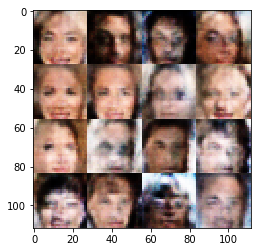

Epoch 0/1... Discriminator Loss: 1.0811... Generator Loss: 1.0441
Epoch 0/1... Discriminator Loss: 1.0014... Generator Loss: 0.8938
Epoch 0/1... Discriminator Loss: 1.1253... Generator Loss: 1.4381
Epoch 0/1... Discriminator Loss: 0.9927... Generator Loss: 0.8236
Epoch 0/1... Discriminator Loss: 1.2381... Generator Loss: 3.3163


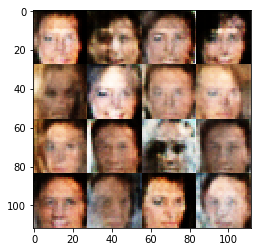

Epoch 0/1... Discriminator Loss: 1.2417... Generator Loss: 0.5159
Epoch 0/1... Discriminator Loss: 0.9210... Generator Loss: 0.8606
Epoch 0/1... Discriminator Loss: 1.0951... Generator Loss: 0.6710
Epoch 0/1... Discriminator Loss: 1.0596... Generator Loss: 0.8100
Epoch 0/1... Discriminator Loss: 1.5921... Generator Loss: 0.3140


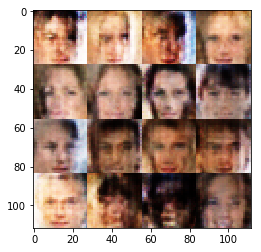

Epoch 0/1... Discriminator Loss: 0.9385... Generator Loss: 0.9138
Epoch 0/1... Discriminator Loss: 1.5893... Generator Loss: 0.3140
Epoch 0/1... Discriminator Loss: 1.0861... Generator Loss: 0.6218
Epoch 0/1... Discriminator Loss: 1.0815... Generator Loss: 0.9213
Epoch 0/1... Discriminator Loss: 1.2216... Generator Loss: 0.5006


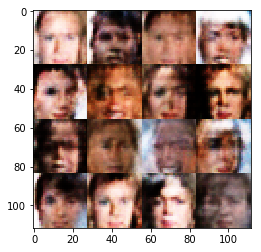

Epoch 0/1... Discriminator Loss: 1.4490... Generator Loss: 0.3902
Epoch 0/1... Discriminator Loss: 0.9628... Generator Loss: 0.9905
Epoch 0/1... Discriminator Loss: 1.1232... Generator Loss: 1.1581
Epoch 0/1... Discriminator Loss: 1.1277... Generator Loss: 1.5995
Epoch 0/1... Discriminator Loss: 1.1992... Generator Loss: 0.9145


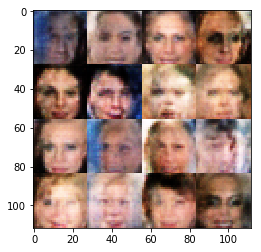

Epoch 0/1... Discriminator Loss: 1.0543... Generator Loss: 0.7344
Epoch 0/1... Discriminator Loss: 0.9097... Generator Loss: 0.9550
Epoch 0/1... Discriminator Loss: 0.9705... Generator Loss: 0.8825
Epoch 0/1... Discriminator Loss: 0.9143... Generator Loss: 0.9731
Epoch 0/1... Discriminator Loss: 1.1672... Generator Loss: 2.7290


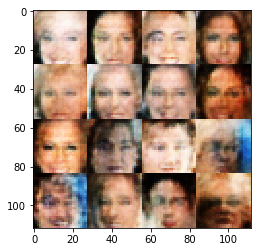

Epoch 0/1... Discriminator Loss: 1.1290... Generator Loss: 1.3477
Epoch 0/1... Discriminator Loss: 1.0901... Generator Loss: 0.5889
Epoch 0/1... Discriminator Loss: 1.0107... Generator Loss: 1.1072
Epoch 0/1... Discriminator Loss: 0.9670... Generator Loss: 1.4866
Epoch 0/1... Discriminator Loss: 0.8135... Generator Loss: 2.7530


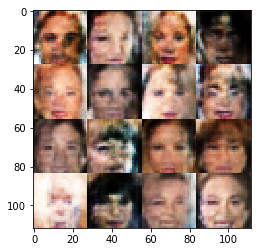

Epoch 0/1... Discriminator Loss: 0.9637... Generator Loss: 1.8513
Epoch 0/1... Discriminator Loss: 0.9458... Generator Loss: 0.9471
Epoch 0/1... Discriminator Loss: 0.8602... Generator Loss: 0.9325
Epoch 0/1... Discriminator Loss: 1.0997... Generator Loss: 1.2628
Epoch 0/1... Discriminator Loss: 0.9796... Generator Loss: 0.7815


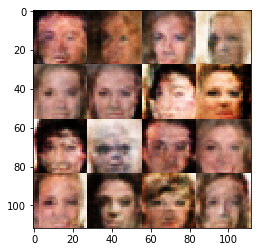

Epoch 0/1... Discriminator Loss: 0.7574... Generator Loss: 0.9801
Epoch 0/1... Discriminator Loss: 0.9225... Generator Loss: 1.7611
Epoch 0/1... Discriminator Loss: 1.2146... Generator Loss: 0.8461
Epoch 0/1... Discriminator Loss: 0.8758... Generator Loss: 1.1714
Epoch 0/1... Discriminator Loss: 0.7910... Generator Loss: 1.0350


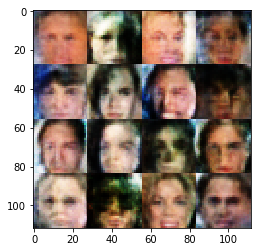

Epoch 0/1... Discriminator Loss: 0.9520... Generator Loss: 1.2285
Epoch 0/1... Discriminator Loss: 1.3873... Generator Loss: 0.4973
Epoch 0/1... Discriminator Loss: 0.8169... Generator Loss: 2.3731
Epoch 0/1... Discriminator Loss: 0.9034... Generator Loss: 1.6494
Epoch 0/1... Discriminator Loss: 0.8726... Generator Loss: 1.0471


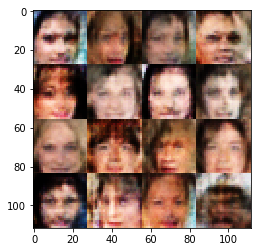

Epoch 0/1... Discriminator Loss: 1.0080... Generator Loss: 1.9385
Epoch 0/1... Discriminator Loss: 1.0671... Generator Loss: 0.8313
Epoch 0/1... Discriminator Loss: 1.0055... Generator Loss: 0.6756
Epoch 0/1... Discriminator Loss: 1.3436... Generator Loss: 0.4270
Epoch 0/1... Discriminator Loss: 0.7422... Generator Loss: 1.2483


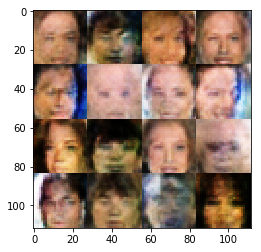

Epoch 0/1... Discriminator Loss: 1.1729... Generator Loss: 0.6197
Epoch 0/1... Discriminator Loss: 1.0926... Generator Loss: 0.6478
Epoch 0/1... Discriminator Loss: 0.9166... Generator Loss: 0.7434
Epoch 0/1... Discriminator Loss: 1.4572... Generator Loss: 2.4906
Epoch 0/1... Discriminator Loss: 1.0185... Generator Loss: 1.4469


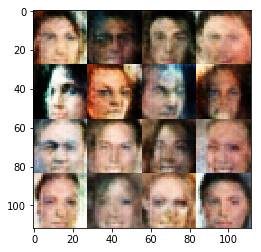

Epoch 0/1... Discriminator Loss: 0.8196... Generator Loss: 1.0441
Epoch 0/1... Discriminator Loss: 0.8669... Generator Loss: 1.1762
Epoch 0/1... Discriminator Loss: 1.0800... Generator Loss: 0.5806
Epoch 0/1... Discriminator Loss: 0.9858... Generator Loss: 0.6789
Epoch 0/1... Discriminator Loss: 0.9302... Generator Loss: 1.9801


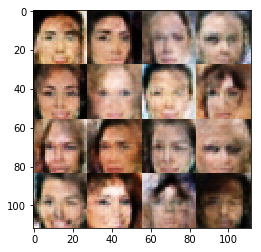

Epoch 0/1... Discriminator Loss: 0.8767... Generator Loss: 0.9399
Epoch 0/1... Discriminator Loss: 0.9651... Generator Loss: 0.8063
Epoch 0/1... Discriminator Loss: 1.4364... Generator Loss: 0.7940
Epoch 0/1... Discriminator Loss: 1.0268... Generator Loss: 2.0279
Epoch 0/1... Discriminator Loss: 1.1579... Generator Loss: 0.5490


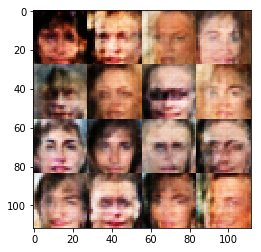

Epoch 0/1... Discriminator Loss: 2.3296... Generator Loss: 2.5085
Epoch 0/1... Discriminator Loss: 1.0120... Generator Loss: 1.0422
Epoch 0/1... Discriminator Loss: 1.1437... Generator Loss: 0.7579
Epoch 0/1... Discriminator Loss: 1.1371... Generator Loss: 0.6094
Epoch 0/1... Discriminator Loss: 1.7704... Generator Loss: 0.2640


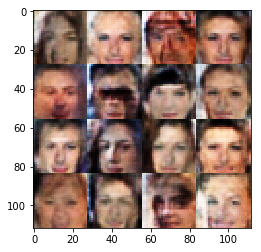

Epoch 0/1... Discriminator Loss: 0.8829... Generator Loss: 1.0408
Epoch 0/1... Discriminator Loss: 0.9192... Generator Loss: 0.9678
Epoch 0/1... Discriminator Loss: 1.1718... Generator Loss: 0.6459
Epoch 0/1... Discriminator Loss: 0.7857... Generator Loss: 1.5378
Epoch 0/1... Discriminator Loss: 0.8375... Generator Loss: 1.4705


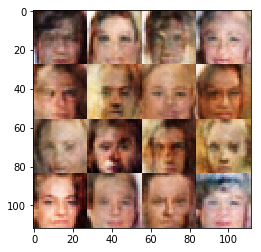

Epoch 0/1... Discriminator Loss: 1.2163... Generator Loss: 1.1319
Epoch 0/1... Discriminator Loss: 1.1002... Generator Loss: 1.7685
Epoch 0/1... Discriminator Loss: 0.8280... Generator Loss: 1.1285
Epoch 0/1... Discriminator Loss: 0.8331... Generator Loss: 1.7073
Epoch 0/1... Discriminator Loss: 0.9690... Generator Loss: 1.7057


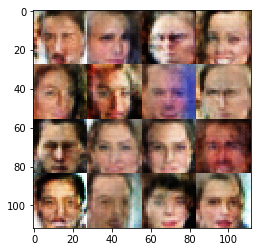

Epoch 0/1... Discriminator Loss: 1.2794... Generator Loss: 0.5253
Epoch 0/1... Discriminator Loss: 0.8341... Generator Loss: 1.0623
Epoch 0/1... Discriminator Loss: 1.0178... Generator Loss: 0.6029
Epoch 0/1... Discriminator Loss: 1.1545... Generator Loss: 1.0168
Epoch 0/1... Discriminator Loss: 0.7572... Generator Loss: 1.1384


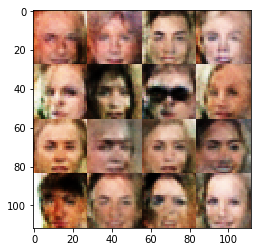

Epoch 0/1... Discriminator Loss: 1.0795... Generator Loss: 0.7463
Epoch 0/1... Discriminator Loss: 0.8425... Generator Loss: 1.3130
Epoch 0/1... Discriminator Loss: 1.0461... Generator Loss: 1.2049
Epoch 0/1... Discriminator Loss: 0.7992... Generator Loss: 1.5026
Epoch 0/1... Discriminator Loss: 0.7883... Generator Loss: 1.3123


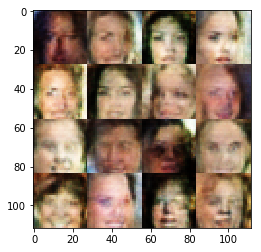

Epoch 0/1... Discriminator Loss: 1.0003... Generator Loss: 1.1143
Epoch 0/1... Discriminator Loss: 1.9170... Generator Loss: 1.4205
Epoch 0/1... Discriminator Loss: 1.0323... Generator Loss: 1.0368
Epoch 0/1... Discriminator Loss: 0.6446... Generator Loss: 2.4507
Epoch 0/1... Discriminator Loss: 1.2051... Generator Loss: 0.5260


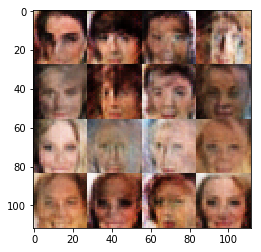

Epoch 0/1... Discriminator Loss: 0.5951... Generator Loss: 1.7741
Epoch 0/1... Discriminator Loss: 0.8769... Generator Loss: 1.1009
Epoch 0/1... Discriminator Loss: 0.8938... Generator Loss: 0.9152
Epoch 0/1... Discriminator Loss: 0.8438... Generator Loss: 1.3047
Epoch 0/1... Discriminator Loss: 0.8870... Generator Loss: 0.8429


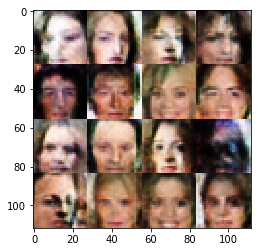

Epoch 0/1... Discriminator Loss: 1.0630... Generator Loss: 1.0705
Epoch 0/1... Discriminator Loss: 0.9585... Generator Loss: 0.8290
Epoch 0/1... Discriminator Loss: 0.9375... Generator Loss: 1.2597
Epoch 0/1... Discriminator Loss: 1.0332... Generator Loss: 1.2378
Epoch 0/1... Discriminator Loss: 1.4181... Generator Loss: 2.1254


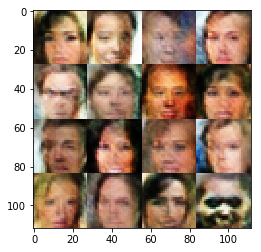

Epoch 0/1... Discriminator Loss: 0.9928... Generator Loss: 0.9081
Epoch 0/1... Discriminator Loss: 1.0034... Generator Loss: 0.6703
Epoch 0/1... Discriminator Loss: 1.0508... Generator Loss: 1.3204
Epoch 0/1... Discriminator Loss: 1.2137... Generator Loss: 0.5152
Epoch 0/1... Discriminator Loss: 0.9692... Generator Loss: 1.3036


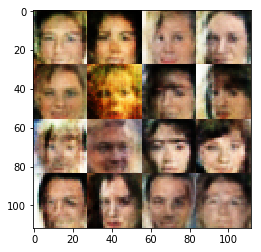

Epoch 0/1... Discriminator Loss: 1.2232... Generator Loss: 0.6633
Epoch 0/1... Discriminator Loss: 1.1735... Generator Loss: 1.4856
Epoch 0/1... Discriminator Loss: 1.0191... Generator Loss: 0.7186
Epoch 0/1... Discriminator Loss: 0.9288... Generator Loss: 1.6285
Epoch 0/1... Discriminator Loss: 0.8149... Generator Loss: 0.8386


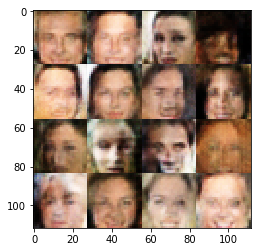

Epoch 0/1... Discriminator Loss: 1.0355... Generator Loss: 0.9303
Epoch 0/1... Discriminator Loss: 1.1506... Generator Loss: 0.7687
Epoch 0/1... Discriminator Loss: 0.7726... Generator Loss: 1.2703
Epoch 0/1... Discriminator Loss: 0.8528... Generator Loss: 1.5555
Epoch 0/1... Discriminator Loss: 1.1044... Generator Loss: 1.0789


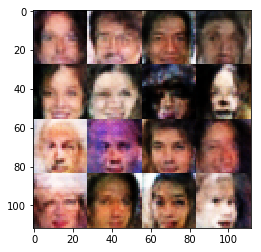

Epoch 0/1... Discriminator Loss: 1.1013... Generator Loss: 0.6052
Epoch 0/1... Discriminator Loss: 1.1410... Generator Loss: 0.7659
Epoch 0/1... Discriminator Loss: 0.8821... Generator Loss: 0.9011
Epoch 0/1... Discriminator Loss: 1.2592... Generator Loss: 0.6215
Epoch 0/1... Discriminator Loss: 1.1767... Generator Loss: 0.7574


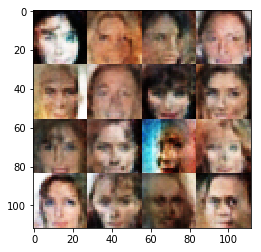

Epoch 0/1... Discriminator Loss: 1.0164... Generator Loss: 0.8040
Epoch 0/1... Discriminator Loss: 1.4630... Generator Loss: 0.3689


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.